In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(9110, 2)

In [3]:
df.head()

,Time,domain
0,2/21/2021 23:35,127.0.0.1:8888
1,2/21/2021 23:35,127.0.0.1:8888
2,2/21/2021 23:35,127.0.0.1:8888
3,2/21/2021 23:35,jupyter-notebook.readthedocs.io
4,2/21/2021 23:23,piazza.com


In [4]:
df.tail()

,Time,domain
9105,1600-12-31 19:00:00,scikit-learn.org
9106,1600-12-31 19:00:00,www.freecodecamp.org
9107,1600-12-31 19:00:00,NaN
9108,1600-12-31 19:00:00,tableausoftware.cvent.com
9109,1600-12-31 19:00:00,cgifederal.secure.force.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

5863

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                               469
www.youtube.com                              400
blackboard.umbc.edu                          314
mail.google.com                               92
github.com                                    86
webauth.umbc.edu                              85
scholar.google.com                            73
lucid.app                                     71
www.amazon.com                                52
piazza.com                                    46
www.linkedin.com                              39
umbcstudents-md.safecolleges.com              35
qualityinteractions.contentcontroller.com     34
www.udemy.com                                 33
my3.my.umbc.edu                               31
mdmom.org                                     31
www.kaggle.com                                31
hangouts.google.com                           30
stackoverflow.com                             27
www.geeksforgeeks.org                         27
umbc-csm.symplicity.

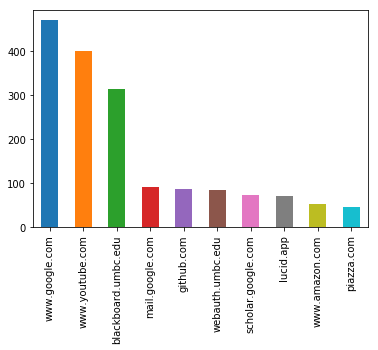

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      32
1       4
3       1
8      27
9      19
10     65
11    162
12    214
13    210
14    224
15    590
16    338
17    201
18    232
19    317
20    166
21    122
22    193
23    130
Name: domain, dtype: int64

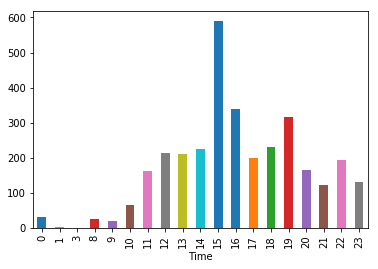

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6
1,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6
2,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6
3,2021-02-21 23:35:00,jupyter-notebook.readthedocs.io,Sunday,6
4,2021-02-21 23:23:00,piazza.com,Sunday,6


In [14]:
df['Day'].value_counts()

Monday       857
Thursday     572
Friday       416
Saturday     393
Wednesday    381
Tuesday      337
Sunday       291
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    857
1    337
2    381
3    572
4    416
5    393
6    291
Name: DayIndex, dtype: int64

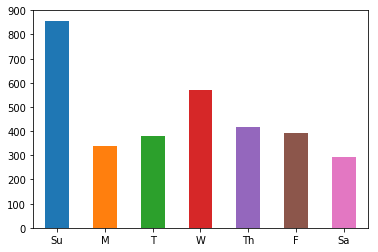

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['Su','M', 'T', 'W','Th', 'F', 'Sa'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
1,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
2,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
3,2021-02-21 23:35:00,jupyter-notebook.readthedocs.io,Sunday,6,True
4,2021-02-21 23:23:00,piazza.com,Sunday,6,True


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
1,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
2,2021-02-21 23:35:00,127.0.0.1:8888,Sunday,6,True
3,2021-02-21 23:35:00,jupyter-notebook.readthedocs.io,Sunday,6,True
4,2021-02-21 23:23:00,piazza.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.youtube.com        374
www.google.com         348
blackboard.umbc.edu    287
mail.google.com         80
webauth.umbc.edu        71
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.google.com         121
github.com              43
scholar.google.com      38
blackboard.umbc.edu     27
www.youtube.com         26
Name: domain, dtype: int64

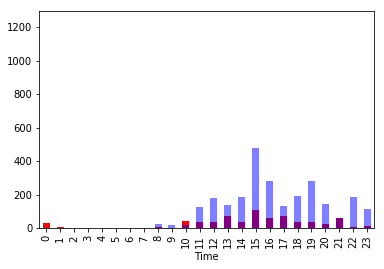

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

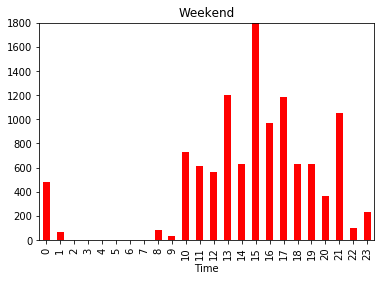

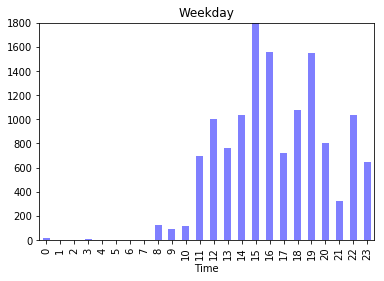

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.google.com                               469
www.youtube.com                              400
blackboard.umbc.edu                          314
mail.google.com                               92
github.com                                    86
webauth.umbc.edu                              85
scholar.google.com                            73
lucid.app                                     71
www.amazon.com                                52
piazza.com                                    46
www.linkedin.com                              39
umbcstudents-md.safecolleges.com              35
qualityinteractions.contentcontroller.com     34
www.udemy.com                                 33
my3.my.umbc.edu                               31
mdmom.org                                     31
www.kaggle.com                                31
hangouts.google.com                           30
stackoverflow.com                             27
www.geeksforgeeks.org                         27
umbc-csm.symplicity.

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

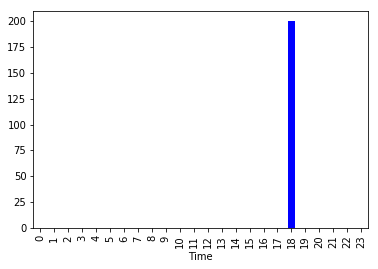

In [28]:
_= show_domain_stats('facebook', 'blue')

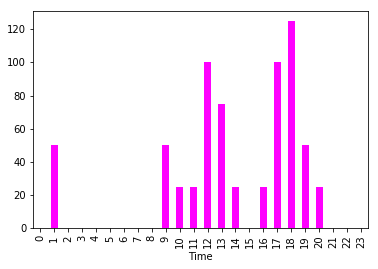

In [29]:
_ = show_domain_stats('stackover', 'magenta')


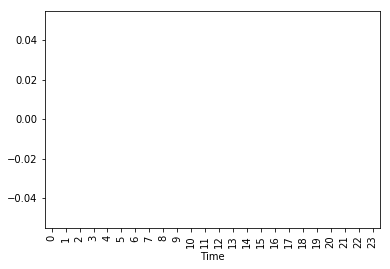

In [30]:
_ = show_domain_stats('netflix', 'red')


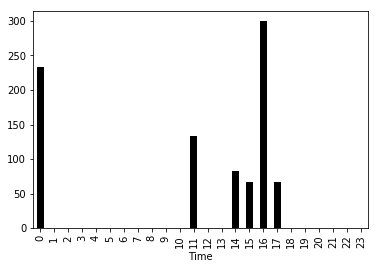

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

1. Personal Computer
2. No
3. a. He is a student and he is learning course related to data as i see more hits on Datascience,udemy and  stackoverflow etc
   b. I also see that the user spends his time wathcing movies 
   c. Also, he is student of UMBC as i see university sites 
   d . He might be user of PNC, also he might be having idea to buy a oneplus phone.
4. He doesnt own netflix account and he often shops at night or in evenings . He is very less active on social media . With these traits, probably he is very studious spends more time reading through noon to night. He doesnt strech his nights, as i see no spikes after midnight.  
   

### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

Yes

### What do you think about this assignment? ( 3 sentences at most! ) 

This is fun assignment. We tend to understand more about ourself, this gave me peak on importance of data and how data is important.I enjoyed doing this.